# Regression Models with Keras on Concrete Strenght

## Introduction

In this notebook we will try different regression models to predict concrete compressive strenght. We will use the Keras library to simplify the process. Keras is a high-level API for building deep learning models and it enables to use TensorFlow and PyTorch, in a simple manner, at the cost of less flexibility.

### Objectives

1. Download and clean the dataset
2. Build Neural Networks with Keras
3. Train, test, and evaluate the networks
4. Select the best perfoming model and explain next steps and limitations

## Table of Contents

1. [Import the libraries](#import-the-libraries)
2. [Download and clean the dataset](#download-and-clean-the-dataset)
3. [Build the neural networks + Train and test](#build-the-neural-networks)
4. [Conclusions and next steps](#conclusions--next-steps)

## Import the libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

## Download and clean the dataset

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:

1. Cement

2. Blast Furnace Slag

3. Fly Ash

4. Water

5. Superplasticizer

6. Coarse Aggregate

7. Fine Aggregate

In [2]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


The strenght is measured in MPa, the age is measured in days, and the rest of the features represent the components, and are measured in cubic meters.

Let's check the number of data points.

In [3]:
concrete_data.shape

(1030, 9)

There are 1029 samples in the model, and because of the few samples, we have to be careful not to overfit the training data.

Let's check for missing values.

In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

There're no missing values. Now we shall describe the dataset.

In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Let's confirm the data types, even if we know that they are all numbers, we want to double-check if they are float or int.

In [6]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Split the data into predictors and target

Since the target variable is the concrete strenght, we will separate it form the independent variables.

In [7]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strenght']]
target = concrete_data['Strength']

Let's make sure we got the split right.

In [8]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

The last step is to normalize the data by subtracting the mean and dividing by the standard deviation. We are not going to use StandardScaler() because we want to do it manually as an exercise.

In [10]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732


Let's save the number of predictors to n_cols since we will need this number when building our network.

In [11]:
n_cols = predictors_norm.shape[1]

## Build the Neural Networks

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

As a first model, let's create a simple model with two hidden layers, each of 50 hidden neurons.

In [43]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [44]:
model = regression_model()

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Next, we will train and test the model at the same time using the fit method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.

In [45]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100


23/23 - 1s - 29ms/step - loss: 1684.2991 - val_loss: 1195.2946
Epoch 2/100
23/23 - 0s - 2ms/step - loss: 1573.4148 - val_loss: 1100.0962
Epoch 3/100
23/23 - 0s - 2ms/step - loss: 1404.7689 - val_loss: 953.7158
Epoch 4/100
23/23 - 0s - 2ms/step - loss: 1126.4617 - val_loss: 742.3363
Epoch 5/100
23/23 - 0s - 2ms/step - loss: 755.8628 - val_loss: 494.0645
Epoch 6/100
23/23 - 0s - 2ms/step - loss: 389.9364 - val_loss: 282.8798
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 183.2936 - val_loss: 178.4372
Epoch 8/100
23/23 - 0s - 2ms/step - loss: 131.6843 - val_loss: 148.4982
Epoch 9/100
23/23 - 0s - 2ms/step - loss: 108.1928 - val_loss: 136.1224
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 90.9437 - val_loss: 125.1079
Epoch 11/100
23/23 - 0s - 2ms/step - loss: 76.0998 - val_loss: 113.1115
Epoch 12/100
23/23 - 0s - 2ms/step - loss: 65.8560 - val_loss: 102.8774
Epoch 13/100
23/23 - 0s - 2ms/step - loss: 55.8091 - val_loss: 93.6787
Epoch 14/100
23/23 - 0s - 2ms/step - loss: 47.4675 - val_loss: 84.7680

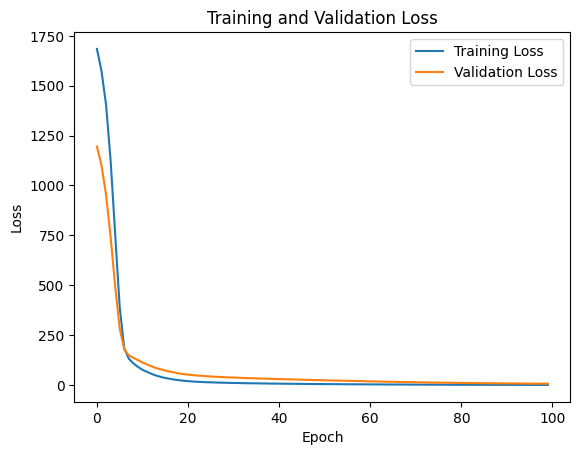

In [46]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of this model is = loss: 0.5155 - val_loss: 6.7195

Let's try to increase the number of layers and maintain the same amount of epochs to see if the model improves.

As a first model, let's create a simple model with five hidden layers, each of 100 hidden neurons. We will keep relu as activation function amnd adam as the optimizer since they are usually the best for these types of problem.

In [47]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [48]:
model = regression_model()

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100


23/23 - 1s - 48ms/step - loss: 1395.2864 - val_loss: 464.4144
Epoch 2/100
23/23 - 0s - 3ms/step - loss: 279.9215 - val_loss: 198.4559
Epoch 3/100
23/23 - 0s - 3ms/step - loss: 109.2115 - val_loss: 132.2828
Epoch 4/100
23/23 - 0s - 3ms/step - loss: 61.6031 - val_loss: 95.6042
Epoch 5/100
23/23 - 0s - 3ms/step - loss: 35.4003 - val_loss: 75.5956
Epoch 6/100
23/23 - 0s - 2ms/step - loss: 25.0713 - val_loss: 63.9732
Epoch 7/100
23/23 - 0s - 3ms/step - loss: 19.6159 - val_loss: 54.8584
Epoch 8/100
23/23 - 0s - 2ms/step - loss: 13.6222 - val_loss: 49.6955
Epoch 9/100
23/23 - 0s - 3ms/step - loss: 10.7099 - val_loss: 47.9517
Epoch 10/100
23/23 - 0s - 3ms/step - loss: 8.5114 - val_loss: 51.8517
Epoch 11/100
23/23 - 0s - 2ms/step - loss: 7.1193 - val_loss: 40.4773
Epoch 12/100
23/23 - 0s - 2ms/step - loss: 5.5059 - val_loss: 40.5496
Epoch 13/100
23/23 - 0s - 2ms/step - loss: 4.4289 - val_loss: 37.1785
Epoch 14/100
23/23 - 0s - 2ms/step - loss: 3.7101 - val_loss: 35.6731
Epoch 15/100
23/23 - 0s 

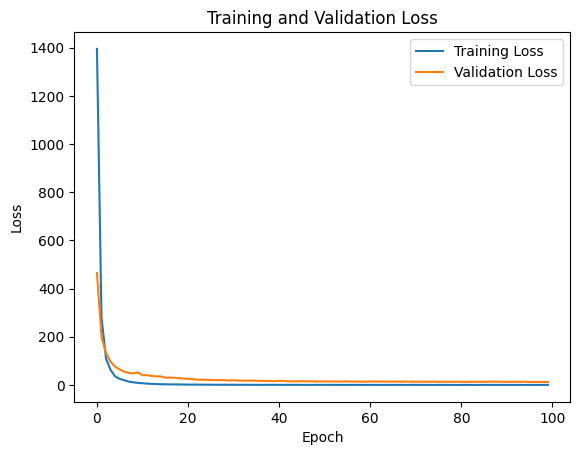

In [50]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of this model is : loss: 0.0663 - val_loss: 12.1488

Interestingly, making the model more complex is increasing the validation loss, while reducing the training loss. This means that the model might be overfitting the data. However, we can see that the validation loss was still in the process of getting smaller, so let's increment the number of epochs.

In [51]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=1000, verbose=2)

Epoch 1/1000
23/23 - 0s - 4ms/step - loss: 0.0888 - val_loss: 12.2640
Epoch 2/1000
23/23 - 0s - 3ms/step - loss: 0.1168 - val_loss: 12.3175
Epoch 3/1000
23/23 - 0s - 3ms/step - loss: 0.0849 - val_loss: 13.0253
Epoch 4/1000
23/23 - 0s - 3ms/step - loss: 0.0573 - val_loss: 12.5570
Epoch 5/1000
23/23 - 0s - 3ms/step - loss: 0.0528 - val_loss: 12.2740
Epoch 6/1000
23/23 - 0s - 3ms/step - loss: 0.0516 - val_loss: 12.3778
Epoch 7/1000
23/23 - 0s - 3ms/step - loss: 0.0473 - val_loss: 11.9869
Epoch 8/1000
23/23 - 0s - 3ms/step - loss: 0.0444 - val_loss: 12.0945
Epoch 9/1000
23/23 - 0s - 3ms/step - loss: 0.0617 - val_loss: 12.6995
Epoch 10/1000
23/23 - 0s - 3ms/step - loss: 0.0720 - val_loss: 11.7597
Epoch 11/1000
23/23 - 0s - 3ms/step - loss: 0.0637 - val_loss: 12.4384
Epoch 12/1000
23/23 - 0s - 3ms/step - loss: 0.0511 - val_loss: 11.6852
Epoch 13/1000
23/23 - 0s - 3ms/step - loss: 0.0493 - val_loss: 11.5757
Epoch 14/1000
23/23 - 0s - 3ms/step - loss: 0.0480 - val_loss: 11.9197
Epoch 15/1000
2

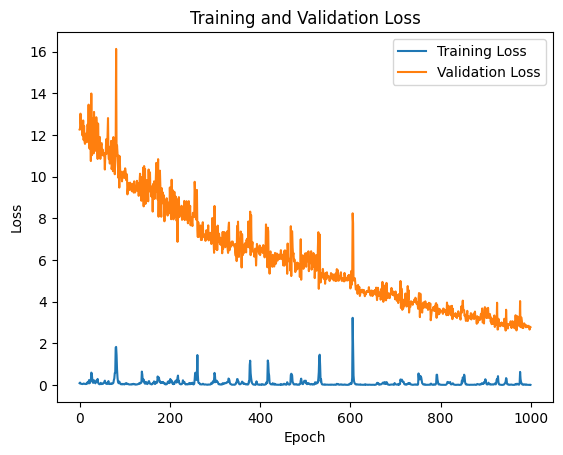

In [52]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of the model is = 0.0078 - val_loss: 2.7788

We can see that the validation loss is still going down, but we can do better by training a simpler model with more epochs.

Let's try the first model again, but changing the activation functions in the hidden layers.

In [55]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(50, activation='sigmoid', input_shape=(n_cols,)))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [56]:
model = regression_model()

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100


23/23 - 1s - 30ms/step - loss: 1614.7809 - val_loss: 1114.1614
Epoch 2/100
23/23 - 0s - 2ms/step - loss: 1491.6711 - val_loss: 1016.8442
Epoch 3/100
23/23 - 0s - 2ms/step - loss: 1384.1090 - val_loss: 939.9142
Epoch 4/100
23/23 - 0s - 2ms/step - loss: 1308.2761 - val_loss: 878.3070
Epoch 5/100
23/23 - 0s - 2ms/step - loss: 1247.6667 - val_loss: 826.5007
Epoch 6/100
23/23 - 0s - 2ms/step - loss: 1192.2627 - val_loss: 780.2798
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 1126.6052 - val_loss: 738.8397
Epoch 8/100
23/23 - 0s - 2ms/step - loss: 1094.2429 - val_loss: 700.5370
Epoch 9/100
23/23 - 0s - 2ms/step - loss: 1038.9711 - val_loss: 663.9052
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 1000.8112 - val_loss: 628.5131
Epoch 11/100
23/23 - 0s - 2ms/step - loss: 960.1925 - val_loss: 593.3282
Epoch 12/100
23/23 - 0s - 2ms/step - loss: 916.5035 - val_loss: 556.8030
Epoch 13/100
23/23 - 0s - 3ms/step - loss: 864.6510 - val_loss: 521.6279
Epoch 14/100
23/23 - 0s - 2ms/step - loss: 834.6743 - val_l

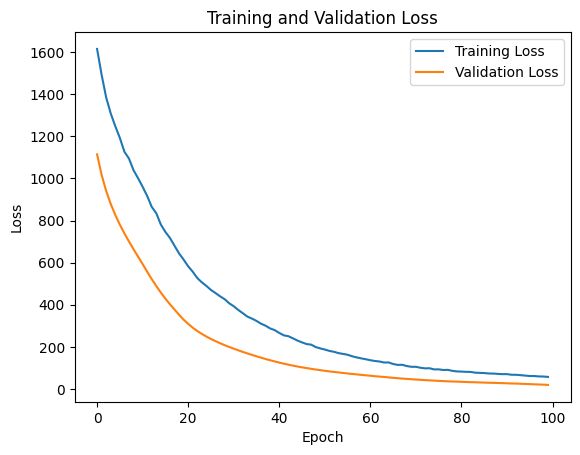

In [58]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The perormance of the model is: loss: 57.3313 - val_loss: 19.2908

The model performs terribly compared to our previous attempts. Due to the problem of the vanishing gradient that affects the sigmoid activation function, the model underfits the data.

We want to try the first model again, but incrementing the number of epochs.

In [59]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [60]:
model = regression_model()

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=500, verbose=2)

Epoch 1/500


23/23 - 1s - 30ms/step - loss: 1619.5007 - val_loss: 1142.7935
Epoch 2/500
23/23 - 0s - 2ms/step - loss: 1469.4431 - val_loss: 1012.3330
Epoch 3/500
23/23 - 0s - 2ms/step - loss: 1195.1829 - val_loss: 803.9102
Epoch 4/500
23/23 - 0s - 2ms/step - loss: 817.4417 - val_loss: 544.0887
Epoch 5/500
23/23 - 0s - 3ms/step - loss: 419.0341 - val_loss: 302.8432
Epoch 6/500
23/23 - 0s - 2ms/step - loss: 175.5636 - val_loss: 168.8144
Epoch 7/500
23/23 - 0s - 2ms/step - loss: 101.0992 - val_loss: 136.7626
Epoch 8/500
23/23 - 0s - 2ms/step - loss: 80.1528 - val_loss: 125.6554
Epoch 9/500
23/23 - 0s - 2ms/step - loss: 68.5476 - val_loss: 115.4247
Epoch 10/500
23/23 - 0s - 2ms/step - loss: 57.4078 - val_loss: 109.6372
Epoch 11/500
23/23 - 0s - 2ms/step - loss: 49.5666 - val_loss: 101.8921
Epoch 12/500
23/23 - 0s - 3ms/step - loss: 43.2059 - val_loss: 94.3388
Epoch 13/500
23/23 - 0s - 2ms/step - loss: 37.6026 - val_loss: 88.8854
Epoch 14/500
23/23 - 0s - 2ms/step - loss: 33.5148 - val_loss: 82.4800
Epo

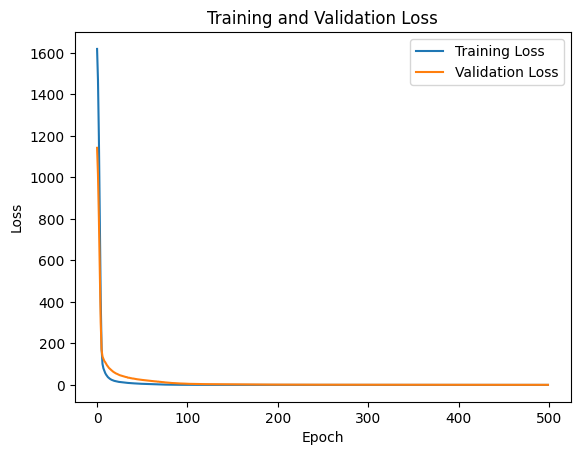

In [62]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of this model is = loss: 0.0069 - val_loss: 0.4398

Increasing the number of epochs is greatly improving both the training and validation losses.

Let's try to add an hidden layer.

In [65]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [66]:
model = regression_model()

In [67]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=500, verbose=2)

Epoch 1/500


23/23 - 1s - 41ms/step - loss: 1651.4647 - val_loss: 1117.3384
Epoch 2/500
23/23 - 0s - 4ms/step - loss: 1427.6025 - val_loss: 803.5388
Epoch 3/500
23/23 - 0s - 3ms/step - loss: 840.1364 - val_loss: 280.2822
Epoch 4/500
23/23 - 0s - 3ms/step - loss: 257.0300 - val_loss: 180.2553
Epoch 5/500
23/23 - 0s - 3ms/step - loss: 142.4777 - val_loss: 129.5562
Epoch 6/500
23/23 - 0s - 3ms/step - loss: 96.8881 - val_loss: 111.1874
Epoch 7/500
23/23 - 0s - 3ms/step - loss: 69.8695 - val_loss: 97.0401
Epoch 8/500
23/23 - 0s - 3ms/step - loss: 53.7347 - val_loss: 83.0105
Epoch 9/500
23/23 - 0s - 2ms/step - loss: 41.7384 - val_loss: 73.0573
Epoch 10/500
23/23 - 0s - 3ms/step - loss: 33.3800 - val_loss: 65.0389
Epoch 11/500
23/23 - 0s - 3ms/step - loss: 27.3331 - val_loss: 58.9339
Epoch 12/500
23/23 - 0s - 3ms/step - loss: 23.3827 - val_loss: 53.9913
Epoch 13/500
23/23 - 0s - 2ms/step - loss: 20.1519 - val_loss: 49.6090
Epoch 14/500
23/23 - 0s - 3ms/step - loss: 17.7050 - val_loss: 46.6298
Epoch 15/500

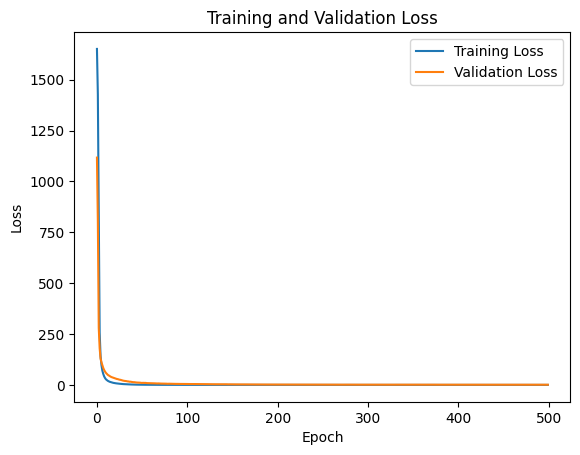

In [68]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of this model is = loss: 0.0093 - val_loss: 0.9931

We can see that the model tends to overfit when adding hidden layers.

Our best model so far is the simple model trained with 500 epochs, so let's train it for 1000 epochs and see what happens.

In [69]:
#define de model
def regression_model():
    #create the model and add the layers
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [70]:
model = regression_model()

C:\Users\gabri\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
#fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=1000, verbose=2)

Epoch 1/1000
23/23 - 1s - 29ms/step - loss: 1614.5760 - val_loss: 1140.6853
Epoch 2/1000
23/23 - 0s - 2ms/step - loss: 1467.6023 - val_loss: 1010.8043
Epoch 3/1000
23/23 - 0s - 2ms/step - loss: 1185.7258 - val_loss: 807.7997
Epoch 4/1000
23/23 - 0s - 2ms/step - loss: 813.7302 - val_loss: 548.0693
Epoch 5/1000
23/23 - 0s - 2ms/step - loss: 417.1693 - val_loss: 310.0298
Epoch 6/1000
23/23 - 0s - 2ms/step - loss: 197.4096 - val_loss: 179.1904
Epoch 7/1000
23/23 - 0s - 2ms/step - loss: 126.7818 - val_loss: 139.6365
Epoch 8/1000
23/23 - 0s - 3ms/step - loss: 100.7800 - val_loss: 123.0763
Epoch 9/1000
23/23 - 0s - 2ms/step - loss: 82.9700 - val_loss: 116.7845
Epoch 10/1000
23/23 - 0s - 2ms/step - loss: 69.7792 - val_loss: 109.9519
Epoch 11/1000
23/23 - 0s - 2ms/step - loss: 57.7643 - val_loss: 102.9659
Epoch 12/1000
23/23 - 0s - 2ms/step - loss: 49.1503 - val_loss: 96.4600
Epoch 13/1000
23/23 - 0s - 2ms/step - loss: 41.9728 - val_loss: 90.0700
Epoch 14/1000
23/23 - 0s - 2ms/step - loss: 36.4

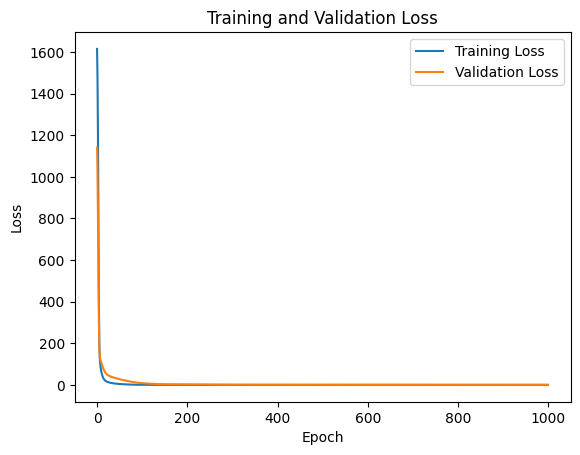

In [72]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The performance of this model is = loss: 0.0149 - val_loss: 0.7014

Apparently, the simple model is best when trained 500 times. As a next step we can try to train it for 400 and 600 epochs to see if it improves. To do so, we can also change the plots by removing the first few epochs, to get mode granular information on the change of loss in the latter epochs.

## Conclusions & Next Steps

It looks like the best model so far is the simple model we used at the beginning, but with a higher number of training epochs. For the moment we have reached maxium performance by training it for 500 epochs, however, we should try to train it for 400 and 600 epochs to see if it improves. To do so, we can also change the plots by removing the first few epochs, to get mode granular information on the change of loss in the latter epochs.

We have also attempted to increase the complexity of the model by adding hidden layers, but those models tended to overfit, and needed many more epochs to train. We have also tried the "sigmoid" activation function, but the mode model underfitted the data due to the vanishing gradient. In the future, we could try also with a different optimizer, even if the adam optimizer is usually the best for this kind of regression problems.

Playng with different epochs is certainly our next step, and we want to adopt mode granular visualization to see at what epoch the model perform the best, and when it starts to overfit the data.